In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
geneexp = pd.read_csv("./HCL_pseudocell30W_1066.csv", sep=',', index_col=0, header=0)
print(geneexp.shape)
geneexp.iloc[:5,:5]

(27341, 1066)


,AdultAdipose0_Cell0,AdultAdrenalGland0_Cell0,AdultAdrenalGland0_Cell1,AdultAdrenalGland0_Cell2,AdultAdrenalGland0_Cell3
A1BG,0,0,0,0,0
A1BG.AS1,1,0,0,0,1
A1CF,0,0,0,0,0
A2M,539,13,15,11,16
A2M.AS1,1,0,1,1,2


# descirbe the datasets

1. total UMI of a cell is normalized to 290,000 ~ 300,000 UMI counts


2. descirbe total UMI distribution of a gene 


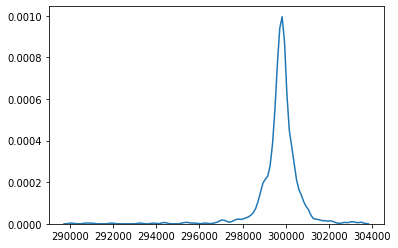

In [3]:
# total UMI of a cell is normalized to 290,000 ~ 300,000 UMI counts
sns.kdeplot(geneexp.sum(0))

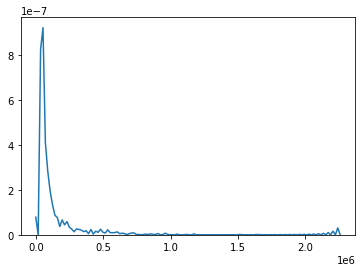

In [4]:
# descirbe total UMI distribution of a gene 
sns.kdeplot(geneexp.sum(1))

# filter genes 

filter genes whose UMI in all pseudocells is less than threshold

threshold: 4 UMI - based on experience 

In [5]:
geneexp[geneexp < 4] = 0
geneexp = geneexp.loc[~(geneexp.sum(1) == 0)]
geneexp.shape

(23515, 1066)

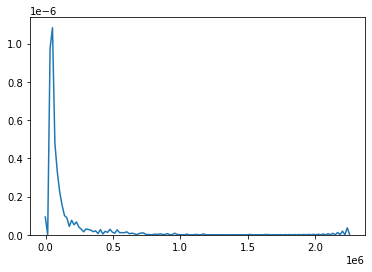

In [6]:
sns.kdeplot(geneexp.sum(1))

# Logarithmize the data

gene expression level 

In [7]:
geneexp_log = np.log2(geneexp + 1e-3)
geneexp_log.iloc[:5,:5]

,AdultAdipose0_Cell0,AdultAdrenalGland0_Cell0,AdultAdrenalGland0_Cell1,AdultAdrenalGland0_Cell2,AdultAdrenalGland0_Cell3
A1BG.AS1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
A1CF,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
A2M,9.074144,3.700551,3.906987,3.459563,4.000090
A2M.AS1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
A2ML1,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784


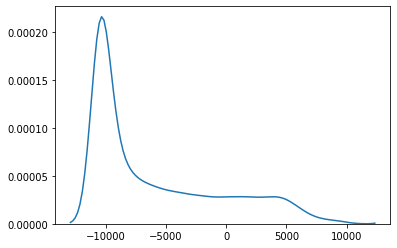

In [8]:
sns.kdeplot(geneexp_log.sum(1))

/home/ggj/anaconda3/envs/sc/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/ggj/anaconda3/envs/sc/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/ggj/anaconda3/envs/sc/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


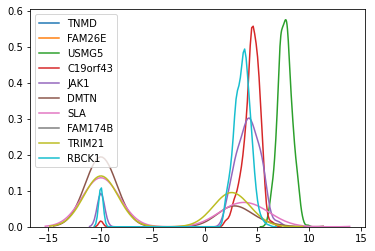

In [22]:
for i in np.random.randint(0, geneexp_log.shape[0], 10):
    sns.kdeplot(geneexp_log.iloc[i,:])

In [24]:
geneexp_log.to_csv("./HCL_pseudocell_log_expr.csv")

# binarized to 0-1 label

1. descirbe total UMI distribution of pseudocell


2. binarize the gene expression level to 0-1 label

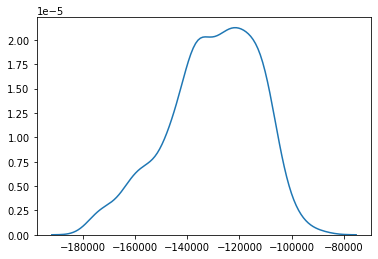

In [25]:
sns.kdeplot(geneexp_log.sum(0))

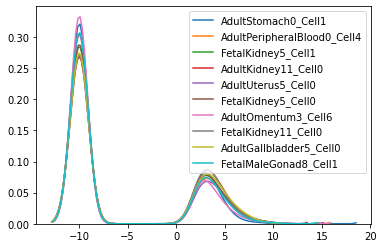

In [26]:
for i in np.random.randint(0, geneexp_log.shape[1], 10):
    sns.kdeplot(geneexp_log.iloc[:,i])

In [27]:
t = np.quantile(geneexp_log, 0.8)
t

3.0001803256099953

In [28]:
geneexp_bin = geneexp_log.copy()
geneexp_bin[geneexp_log >= t] = 1
geneexp_bin[geneexp_log < t] = 0
geneexp_bin.iloc[:5, :5]

,AdultAdipose0_Cell0,AdultAdrenalGland0_Cell0,AdultAdrenalGland0_Cell1,AdultAdrenalGland0_Cell2,AdultAdrenalGland0_Cell3
A1BG.AS1,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0
A2M,1.0,1.0,1.0,1.0,1.0
A2M.AS1,0.0,0.0,0.0,0.0,0.0
A2ML1,0.0,0.0,0.0,0.0,0.0


In [29]:
gene_cnt = np.sum(geneexp_bin, axis=0)
gene_cnt

AdultAdipose0_Cell0         6440.0
AdultAdrenalGland0_Cell0    4716.0
AdultAdrenalGland0_Cell1    4711.0
AdultAdrenalGland0_Cell2    4764.0
AdultAdrenalGland0_Cell3    4769.0
                             ...  
Placenta5_Cell1             4329.0
Placenta5_Cell2             4344.0
Placenta6_Cell0             5718.0
Placenta7_Cell0             5537.0
Placenta8_Cell0             4855.0
Length: 1066, dtype: float64

<BarContainer object of 1066 artists>

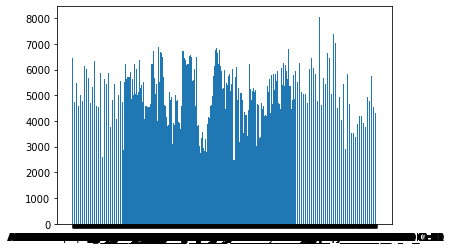

In [30]:
plt.bar(gene_cnt.index, gene_cnt.values)

In [32]:
geneexp_bin.to_csv("./HCL_pseudocell_bin.csv")

# relationale of label 

correlation between label and datasets 

In [33]:
def mean2(x):
    y = np.sum(x) / np.size(x)
    return y

def corr2(a, b):
    a = a - mean2(a)
    b = b - mean2(b)
    r = (a * b).sum() / np.sqrt((a * a).sum() * (b * b).sum())
    return r

In [34]:
from scipy.stats import pearsonr, spearmanr

In [35]:
corr2(geneexp, geneexp_log)

AdultAdipose0_Cell0         0.191671
AdultAdrenalGland0_Cell0    0.161461
AdultAdrenalGland0_Cell1    0.160590
AdultAdrenalGland0_Cell2    0.161787
AdultAdrenalGland0_Cell3    0.162847
                              ...   
Placenta5_Cell1             0.107766
Placenta5_Cell2             0.105148
Placenta6_Cell0             0.087857
Placenta7_Cell0             0.147168
Placenta8_Cell0             0.134019
Length: 1066, dtype: float64

In [36]:
pearson_r_l, pearson_p_l = [], []
for i in range(geneexp.shape[-1]):
    r, p = pearsonr(geneexp.iloc[:,i], geneexp_log.iloc[:,i])
    pearson_r_l.append(r); pearson_p_l.append(p)
    

In [37]:
pearson_r_l

[0.4193596428928117,
 0.40147493230853226,
 0.40232122663859404,
 0.40383009108959195,
 0.4048363667338357,
 0.40472198592753034,
 0.4018258307496586,
 0.4033005828507844,
 0.42460426684053987,
 0.4241411566862223,
 0.42508431065932684,
 0.4321488968942684,
 0.4002535713202789,
 0.4008738554318211,
 0.22276362004402211,
 0.42560827399289747,
 0.26659035008535026,
 0.08090235656272357,
 0.33493007762584276,
 0.34734615823279585,
 0.33773439996361876,
 0.3464161160110449,
 0.34392888469274546,
 0.33457975471032925,
 0.3487237826829652,
 0.34901299142406206,
 0.2985150721054242,
 0.3026892415755284,
 0.29035847670829884,
 0.29519530622354184,
 0.4049181133903597,
 0.4034695489017898,
 0.38626498182924635,
 0.3885946175127287,
 0.38896991983122226,
 0.329438699417401,
 0.3285661319444892,
 0.34024741879631176,
 0.2766884489489732,
 0.27578739056353374,
 0.28719503783644146,
 0.28009294692711995,
 0.36976448506471166,
 0.3709831524052867,
 0.37949555246933236,
 0.3729926752553319,
 0.374182

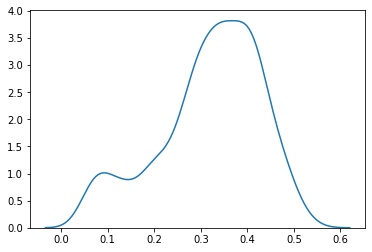

In [38]:
sns.kdeplot(corr2(geneexp, geneexp_bin))

In [39]:
pearson_r_l, pearson_p_l = [], []
for i in range(geneexp.shape[-1]):
    r, p = pearsonr(geneexp.iloc[:,i], geneexp_bin.iloc[:,i])
    pearson_r_l.append(r); pearson_p_l.append(p)
pearson_r_l

[0.3947121552832565,
 0.3827909232742829,
 0.3810978643433591,
 0.38215349442863583,
 0.3840258666690422,
 0.384030251816969,
 0.38242213957463955,
 0.38302627765235175,
 0.4042743457003223,
 0.4043124677281472,
 0.40602961042740215,
 0.4158883131672236,
 0.38014426404274376,
 0.3827764918763171,
 0.2036900626470777,
 0.41079229291209,
 0.2486890102246475,
 0.06526435483132315,
 0.314806312905908,
 0.3260095526757954,
 0.31798622629971207,
 0.3254189407674288,
 0.3231178043714686,
 0.3147328867409524,
 0.3300733127151684,
 0.3282287984905925,
 0.2821683305089953,
 0.2856580930101341,
 0.27524777993175037,
 0.27960118355772223,
 0.3819097902242919,
 0.3787942157035538,
 0.36797553461789956,
 0.37027570638021706,
 0.3724858015534291,
 0.3106238684438064,
 0.3092189017590278,
 0.3198771969563425,
 0.2586045367248303,
 0.25703003624628323,
 0.2664611838911094,
 0.261283760569851,
 0.34766720843607146,
 0.3478940085972883,
 0.358947261716152,
 0.34954914269447396,
 0.35072976044578674,
 0.3

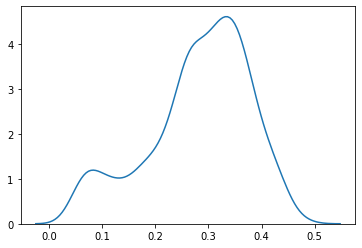

In [40]:
sns.kdeplot(pearson_r_l)